In [2]:
# Importing Pandas Library
import pandas as pd

# Importing excel sheets as data frames
off_fg_df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/ECON 5283 - Data Visualization with Python/Project/MLB_Team_Offensive_Data_2015-2024_FG.xlsx")
off_br_df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/ECON 5283 - Data Visualization with Python/Project/MLB_Team_Offensive_Data_2015-2024_BR.xlsx")
pitch_fg_df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/ECON 5283 - Data Visualization with Python/Project/MLB_Team_Pitching_Data_2015-2024_FG.xlsx")
pay_st_df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/ECON 5283 - Data Visualization with Python/Project/MLB_Payroll_Data_2015-2024_ST.xlsx")

In [3]:
# Removing unnecessary columns from each DataFrame (Including OPS+ and FIP- for robustness checks)
off_fg_df.drop(off_fg_df.columns.difference(['Season','Team', 'wRC+']), axis=1, inplace=True)
off_br_df.drop(off_br_df.columns.difference(['Season','Team', 'W', 'L', 'OPS+']), axis=1, inplace=True)
pitch_fg_df.drop(pitch_fg_df.columns.difference(['Season','Team', 'FIP-', 'ERA-']), axis=1, inplace=True)

# Ensuring each table has 300 rows (30 teams * 10 years)
print(off_fg_df)
print(off_br_df)
print(pitch_fg_df)
print(pay_st_df)

     Season Team  wRC+
0      2024  LAA    91
1      2024  BAL   114
2      2024  BOS   105
3      2024  CHW    75
4      2024  CLE   100
..      ...  ...   ...
295    2015  PHI    86
296    2015  PIT    97
297    2015  STL    97
298    2015  SDP    90
299    2015  SFG   104

[300 rows x 3 columns]
     Season Team    W   L  OPS+
0      2024  LAA   63  99    89
1      2024  ARI   89  73   114
2      2024  ATL   89  73   100
3      2024  BAL   91  71   115
4      2024  BOS   81  81   107
..      ...  ...  ...  ..   ...
295    2015  STL  100  62    95
296    2015  TBR   80  82   100
297    2015  TEX   88  74    98
298    2015  TOR   93  69   115
299    2015  WSN   83  79    96

[300 rows x 5 columns]
     Season Team  ERA-  FIP-
0      2024  LAA   112   113
1      2024  BAL    99    97
2      2024  BOS    97   100
3      2024  CHW   116   108
4      2024  CLE    91    98
..      ...  ...   ...   ...
295    2015  PHI   120   110
296    2015  PIT    84    88
297    2015  STL    77    91
29

In [4]:
# Renaming column in Payroll table
pay_st_df = pay_st_df.rename(columns={'Year': 'Season'})

# Merging DataFrames
mlb_df = off_fg_df.merge(off_br_df, on=['Season', 'Team'], how='inner') \
                  .merge(pitch_fg_df, on=['Season', 'Team'], how='inner') \
                  .merge(pay_st_df, on=['Season', 'Team'], how='inner')

print(mlb_df.head())

   Season Team  wRC+   W    L  OPS+  ERA-  FIP-    Payroll
0    2024  LAA    91  63   99    89   112   113  172189987
1    2024  BAL   114  91   71   115    99    97  111345494
2    2024  BOS   105  81   81   107    97   100  190037445
3    2024  CHW    75  41  121    76   116   108  141710031
4    2024  CLE   100  92   69   100    91    98  106824582


In [5]:
# Importing NumPy
import numpy as np

# Removing the 2020 Season (only 60 games played instead of the usual 162)
mlb_df = mlb_df[mlb_df["Season"] != 2020]

# Adding Winning Percentage (WPct)
mlb_df['WPct'] = (mlb_df['W'] / (mlb_df['W'] + mlb_df['L']))
mlb_df = mlb_df[['Season', 'Team', 'W', 'L', 'WPct',
                'wRC+', 'FIP-', 'OPS+', 'ERA-', 'Payroll']]

# Changing Payroll to be in Millions & Log Payroll
mlb_df['log_Payroll'] = np.log(mlb_df['Payroll'])

# Cleaned Dataset (300 - 30 rows from 2020 = 270 rows)
print(mlb_df)

# Checking for null values
print("=== Missing Values by Column ===")
print(mlb_df.isnull().sum())

# Checking for duplicate rows
print("=== Number of Duplicate Rows ===")
print(mlb_df.duplicated().sum())

# Checking for missing teams by season
print("=== Team Count by Season ===")
team_counts = mlb_df.groupby('Season')['Team'].nunique().sort_index()
print(team_counts)

     Season Team    W    L      WPct  wRC+  FIP-  OPS+  ERA-    Payroll  \
0      2024  LAA   63   99  0.388889    91   113    89   112  172189987   
1      2024  BAL   91   71  0.561728   114    97   115    99  111345494   
2      2024  BOS   81   81  0.500000   105   100   107    97  190037445   
3      2024  CHW   41  121  0.253086    75   108    76   116  141710031   
4      2024  CLE   92   69  0.571429   100    98   100    91  106824582   
..      ...  ...  ...  ...       ...   ...   ...   ...   ...        ...   
295    2015  PHI   63   99  0.388889    86   110    89   120  141722639   
296    2015  PIT   98   64  0.604938    97    88    97    84   99435606   
297    2015  STL  100   62  0.617284    97    91    95    77  132178951   
298    2015  SDP   74   88  0.456790    90   103    91   110  107915272   
299    2015  SFG   84   78  0.518519   104   106   101   100  181613630   

     log_Payroll  
0      18.964109  
1      18.528148  
2      19.062732  
3      18.769293  
4   

In [6]:
# Descriptive Statistics
import numpy as np
mlb_df.describe()
pd.set_option('display.float_format', '{:,.5f}'.format)
mlb_df.describe()

,Season,W,L,WPct,wRC+,FIP-,OPS+,ERA-,Payroll,log_Payroll
count,270.00000,270.00000,270.00000,270.00000,270.00000,270.00000,270.00000,270.00000,270.00000,270.00000
mean,"2,019.44444",80.97778,80.97778,0.49999,97.72222,100.05556,97.89630,100.04074,"144,273,876.64074",18.70913
std,3.02816,13.04323,13.02412,0.08047,9.62304,8.43963,8.91286,11.03805,"56,702,754.54537",0.40306
min,"2,015.00000",41.00000,51.00000,0.25309,75.00000,75.00000,76.00000,71.00000,"42,421,870.00000",17.56317
25%,"2,017.00000",72.00000,72.00000,0.44444,91.00000,95.00000,92.00000,92.00000,"99,595,787.50000",18.41663
50%,"2,019.00000",81.50000,80.00000,0.50464,97.00000,100.00000,97.50000,99.50000,"140,318,618.00000",18.75942
75%,"2,022.00000",90.75000,90.00000,0.55760,104.00000,106.00000,104.00000,107.00000,"179,283,155.25000",19.00448
max,"2,024.00000",111.00000,121.00000,0.68519,126.00000,124.00000,126.00000,133.00000,"346,277,812.00000",19.66275


Text(0.5, 1.0, 'MLB wRC+ vs Win Percentage (2015-2024)')

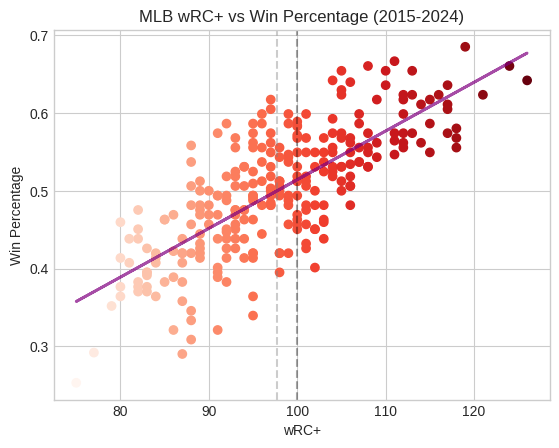

In [7]:
# Loading libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-v0_8-whitegrid')

# Establishing plot variables
x=mlb_df['wRC+']
y=mlb_df['WPct']

# Mapping color
color = np.sqrt((x**2-70**2) + (y**2-0.2**2))

# Plotting graph
plt.scatter(x, y, c=color, cmap='Reds')
plt.axvline(x=97.7222, color='gray', linestyle='--', alpha=0.4)
plt.axvline(x=100, color='black', linestyle='--', alpha=0.35)

# Plotting line of best fit
slope, intercept = np.polyfit(x, y, 1)
line = (slope * x) + intercept
plt.plot(x, line, color='purple', linewidth=2, alpha=0.7)

# Customization
plt.xlabel('wRC+')
plt.ylabel('Win Percentage')
plt.title('MLB wRC+ vs Win Percentage (2015-2024)')

Text(0.5, 1.0, 'MLB FIP- vs Win Percentage (2015-2024)')

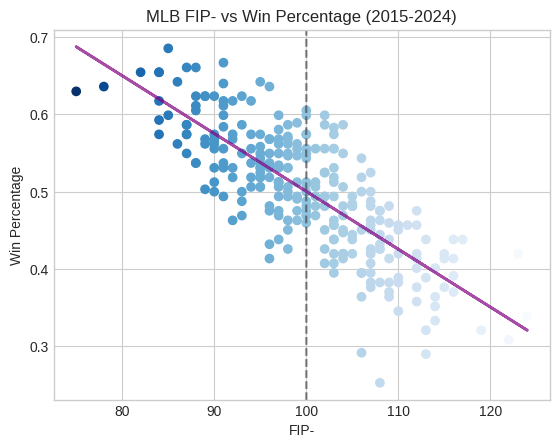

In [8]:
# Establishing plot variables
x1=mlb_df['FIP-']
y1=mlb_df['WPct']

# Mapping color
color = np.sqrt(((x1**2)-(70**2)) + ((y1**2)-(0.7**2)))

# Plotting graph
plt.scatter(x1, y1, c=color, cmap='Blues_r')
plt.axvline(x=100.06, color='gray', linestyle='--', alpha=0.4)
plt.axvline(x=100, color='black', linestyle='--', alpha=0.35)

# Plotting line of best fit
slope, intercept = np.polyfit(x1, y1, 1)
line = (slope * x1) + intercept
plt.plot(x1, line, color='purple', linewidth=2, alpha=0.7)

# Customization
plt.xlabel('FIP-')
plt.ylabel('Win Percentage')
plt.title('MLB FIP- vs Win Percentage (2015-2024)')

Text(0.5, 1.0, 'wRC+ Distribution (2015-2024)')

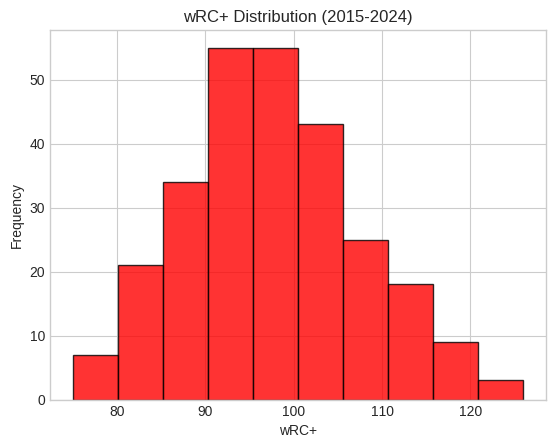

In [9]:
# wRC+ Histogram
plt.hist(mlb_df["wRC+"], bins = 10, color = 'red', alpha=0.8, edgecolor='black')

# Customization
plt.xlabel('wRC+')
plt.ylabel('Frequency')
plt.title('wRC+ Distribution (2015-2024)')

Text(0.5, 1.0, 'FIP- Distribution (2015-2024)')

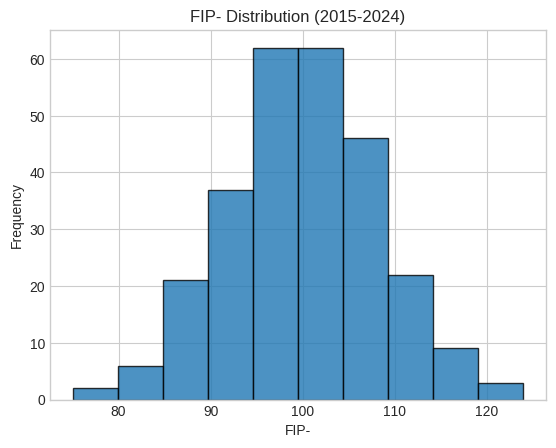

In [10]:
# FIP- Histogram #
plt.hist(mlb_df["FIP-"], bins = 10, alpha=0.8, edgecolor='black')

# Customization
plt.xlabel('FIP-')
plt.ylabel('Frequency')
plt.title('FIP- Distribution (2015-2024)')

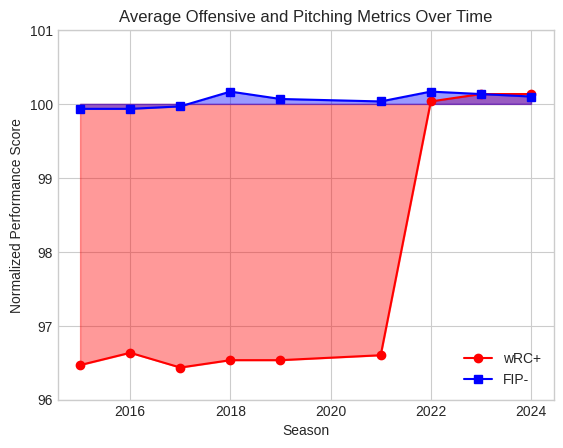

In [11]:
# Creating plot background
fig, ax = plt.subplots()

# Average wRC+ and FIP- values per Season
avg_wrc_and_fip = mlb_df.groupby('Season')[['wRC+', 'FIP-']].mean()

# Plotting time series lines
ax.plot(avg_wrc_and_fip.index, avg_wrc_and_fip['wRC+'], marker='o', label='wRC+', color='red')
ax.plot(avg_wrc_and_fip.index, avg_wrc_and_fip['FIP-'], marker='s', label='FIP-', color='blue')

# Filling in space between lines to 100
fill_in_area_wrc = (avg_wrc_and_fip['wRC+'] >= 100) | (avg_wrc_and_fip['wRC+'] <= 100)
fill_in_area_fip = (avg_wrc_and_fip['FIP-'] >= 100) | (avg_wrc_and_fip['FIP-'] <= 100)
ax.fill_between(avg_wrc_and_fip.index, avg_wrc_and_fip['wRC+'], 100, where = fill_in_area_wrc, color = 'red', alpha = 0.4)
ax.fill_between(avg_wrc_and_fip.index, avg_wrc_and_fip['FIP-'], 100, where = fill_in_area_wrc, color='blue', alpha = 0.4)

# Customizing
plt.ylim(96, 101)
plt.xlabel('Season')
plt.ylabel('Normalized Performance Score')
plt.title('Average Offensive and Pitching Metrics Over Time')
plt.legend(loc='lower right')

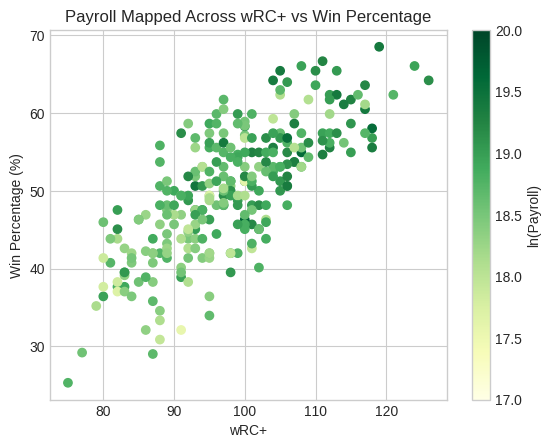

In [12]:
# Establishing plot variables
x2=mlb_df['wRC+']
y2=mlb_df['WPct'] * 100

# Mapping color
color = mlb_df['log_Payroll']

# Scatter plot
plt.scatter(x2, y2, c=color, cmap='YlGn', vmin=17, vmax=20)

# Customization
plt.xlabel('wRC+')
plt.ylabel('Win Percentage (%)')
plt.title('Payroll Mapped Across wRC+ vs Win Percentage')
plt.colorbar(label='ln(Payroll)')
plt.show()

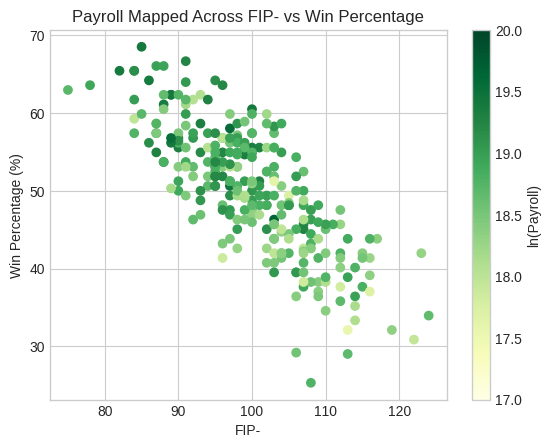

In [13]:
# Establishing plot variables
x2=mlb_df['FIP-']
y2=mlb_df['WPct'] * 100

# Mapping color
color = mlb_df['log_Payroll']

# Scatter plot
plt.scatter(x2, y2, c=color, cmap='YlGn', vmin=17, vmax=20)

# Customization
plt.xlabel('FIP-')
plt.ylabel('Win Percentage (%)')
plt.title('Payroll Mapped Across FIP- vs Win Percentage')
plt.colorbar(label='ln(Payroll)')
plt.show()

In [14]:
# Importing libraries
import statsmodels.api as sm

# Defining the predictors and response variables
X = mlb_df[['wRC+', 'FIP-', 'log_Payroll']]
X = sm.add_constant(X)
y = mlb_df['WPct']

# Fitting the regression model
model = sm.OLS(y,X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   WPct   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     317.8
Date:                Wed, 07 Jan 2026   Prob (F-statistic):           1.29e-87
Time:                        02:22:17   Log-Likelihood:                 503.30
No. Observations:                 270   AIC:                            -998.6
Df Residuals:                     266   BIC:                            -984.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.5796      0.127      4.580      

In [15]:
# Importing library
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculating VIF for each predictor to test for multicollinearity
X = mlb_df[['wRC+', 'FIP-', 'log_Payroll']]
X = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factor:")
print(vif_data)


Variance Inflation Factor:
      Variable         VIF
0        const 3,025.82324
1         wRC+     1.49436
2         FIP-     1.37586
3  log_Payroll     1.25628


In [16]:
# Heteroskedasticity check
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(model.resid, model.model.exog)
lm_stat, lm_pvalue, f_stat, f_pvalue = bp_test

print("LM Statistic:", lm_stat)
print("LM p-value:", lm_pvalue)
print("F Statistic:", f_stat)
print("F p-value:", f_pvalue)

LM Statistic: 7.138642194413447
LM p-value: 0.06760763328490281
F Statistic: 2.4079598963830935
F p-value: 0.06754058266656329


In [17]:
# F-Test (H0 = Beta1 + Beta2 = 0)
hypothesis = 'wRC+ + FIP- = 0'
f_test = model.f_test(hypothesis)
print(f_test)

<F test: F=5.750974246880449, p=0.017168938877853975, df_denom=266, df_num=1>


\newpage

In [18]:
# Importing libraries
import statsmodels.api as sm

# Defining the predictors and response variables
X = mlb_df[['OPS+', 'ERA-', 'log_Payroll']]
X = sm.add_constant(X)
y = mlb_df['WPct']

# Fitting the regression model
model2 = sm.OLS(y,X).fit()

print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                   WPct   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     613.5
Date:                Wed, 07 Jan 2026   Prob (F-statistic):          3.68e-119
Time:                        02:22:17   Log-Likelihood:                 577.08
No. Observations:                 270   AIC:                            -1146.
Df Residuals:                     266   BIC:                            -1132.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.6327      0.094      6.746      

In [19]:
# Importing library
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculating VIF for each predictor to test for multicollinearity
X = mlb_df[['OPS+', 'ERA-', 'log_Payroll']]
X = sm.add_constant(X)
vif_data2 = pd.DataFrame()
vif_data2["Variable"] = X.columns
vif_data2["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factor:")
print(vif_data)


Variance Inflation Factor:
      Variable         VIF
0        const 3,025.82324
1         wRC+     1.49436
2         FIP-     1.37586
3  log_Payroll     1.25628


In [20]:
# Heteroskedasticity check
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test2 = het_breuschpagan(model2.resid, model2.model.exog)
lm_stat2, lm_pvalue2, f_stat2, f_pvalue2 = bp_test2

print("LM Statistic:", lm_stat2)
print("LM p-value:", lm_pvalue2)
print("F Statistic:", f_stat2)
print("F p-value:", f_pvalue2)

LM Statistic: 7.33247336981223
LM p-value: 0.06202282818335681
F Statistic: 2.475166917145029
F p-value: 0.061885206634377125


In [21]:
# F-Test (H0 = Beta1 + Beta2 = 0)
hypothesis2 = 'OPS+ + ERA- = 0'
f_test2 = model2.f_test(hypothesis2)
print(f_test2)

<F test: F=14.650040579938667, p=0.00016141211653187258, df_denom=266, df_num=1>


\newpage

In [22]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic
!apt-get install -y pandoc


import nbformat

notebook_path = '/content/drive/MyDrive/Colab Notebooks/ECON 5283 - Data Visualization with Python/Project/Econometrics Project.ipynb'

with open(notebook_path) as f:
    nb = nbformat.read(f, as_version=4)

nb['metadata']['title'] = 'Offense vs. Pitching: An Econometric Analysis of What Drives Winning in Major League Baseball'
nb['metadata']['authors'] = [{
    'name': 'Adrian Montez'
}]

with open(notebook_path, 'w') as f:
    nbformat.write(nb, f)


!jupyter nbconvert --to pdf '/content/drive/MyDrive/Colab Notebooks/ECON 5283 - Data Visualization with Python/Project/Econometrics Project.ipynb'

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono
  fonts-texgyre fonts-urw-base35 libapache-pom-java libcommons-logging-java
  libcommons-parent-java libfontbox-java libgs9 libgs9-common libidn12
  libijs-0.35 libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1 libruby3.0
  libsynctex2 libteckit0 libtexlua53 libtexluajit2 libwoff1 libzzip-0-13
  lmodern poppler-data preview-latex-style rake ruby ruby-net-telnet
  ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0 rubygems-integration t1utils
  teckit tex-common tex-gyre texlive-base texlive-binaries texlive-latex-base
  texlive-latex-extra texlive-latex-recommended texlive-pictures tipa
  xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf libavalon-framework-java
  libcommons-logging-java-doc libexcalibur-logkit-java 

In [26]:
from google.colab import files
mlb_df.to_csv('cleaned_mlb_dataset.csv', index=False)
files.download('cleaned_mlb_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>